# Handwritten Digit Recognition Machine Learning Model

This notebook aims to classify handwritten digits using different machine learning models. Tutorials were provided by [Dataflair](https://data-flair.training/blogs/python-deep-learning-project-handwritten-digit-recognition/), [NeuralNine](https://www.youtube.com/watch?v=Zi4i7Q0zrBs) and [Programming with Mosh](https://www.youtube.com/watch?v=7eh4d6sabA0) along with modifications made to allow for user input.

In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2 as cv
import csv

Training data is stored in the mnist_train.csv file and testing data is stored in the mnist_test.csv file, this was provided by Dariel Dato-on on [Kaggle](https://www.kaggle.com/oddrationale/mnist-in-csv). Download these files and add them to the same directory.

In [4]:
mnist_train = pd.read_csv('mnist_train.csv')
mnist_test = pd.read_csv('mnist_test.csv')

In [5]:
mnist_train.shape
#Print the first 4 rows for reference
mnist_train.head(4)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The MNIST dataset is already split in training (85%) and testing sets (15%), to use these sets we will filter through the data by dropping/retaining certain columns

In [24]:
X_train = mnist_train.drop(columns=['label'])
Y_train = mnist_train['label']

X_test = mnist_test.drop(columns=['label'])
Y_test = mnist_test['label']

#Print the first 4 rows of the x_train set to verify data filtration
X_train.head(4)

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Through the removal of the 'label' column, the X_train set is composed of accurate information for the machine learning models.

# Decision Tree Classifier

A decision tree classifier is a machine learning model that looks for patterns and observations in testing data to create final predictions

In [7]:
#Initialize and train the decision tree classifier
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
#Calculate model accuracy
predictions = model.predict(X_test)
score = accuracy_score(Y_test,predictions)
print(f'Accuracy: {round(score*100,2)}')

Accuracy: 87.83


In [9]:
#Save the model for future use
joblib.dump(model,'hdr_dtc.joblib')

['hdr_dtc.joblib']

# Neural Network

Neural networks are a subset in machine learning and often used in deep learning algorithms such as optical character recognition. If the output of a node is above a generated value (by the algorithm), data is passed to the next layer of the network. Otherwise, no data is passed. Through this process, predictions and decisions can be made.

In [10]:
model_NN = tf.keras.models.Sequential()
model_NN.add(tf.keras.layers.Flatten(input_shape=(784,1)))
model_NN.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model_NN.add(tf.keras.layers.Dense(units=10,activation=tf.nn.softmax))

The adam optimizer algorithm will be used from the keras library as it is well suited for large datasets while also reducing memory usage. Sparse categorical cross entropy is used as the loss function as it requires minimal memory.

In [11]:
model_NN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
model_NN.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.7881 - accuracy: 0.8662
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3621 - accuracy: 0.9168
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2749 - accuracy: 0.9310
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2453 - accuracy: 0.9370
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2332 - accuracy: 0.9402


In [13]:
loss, accuracy = model_NN.evaluate(X_test,Y_test)
print(f'Accuracy: {round(accuracy*100,2)}')
print(f'Loss: {round(loss,3)}')

313/313 [==============================] - 1s 1ms/step - loss: 0.2543 - accuracy: 0.9397
Accuracy: 93.97
Loss: 0.254


As can be seen from the accuracy ratings, the neural network is more accurate at classifying handwritten digits than the decision tree.

In [14]:
#Save the model for future use
model_NN.save('hdr_nn.h5')

# Testing with User Input

To test the models with user input, create a 28x28 greyscale image file in the same directory as this notebook and title it ```Image.png```, then run the cells below. The last cell has lines for both models.


Neural Network Prediction: 6
Decision Tree Prediction: [6]


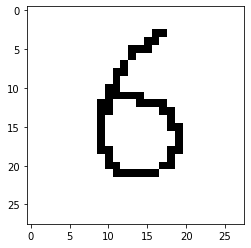

In [57]:
#Convert the image into a 2D string array with one row
img = cv.imread('Image.png')[:,:,0]
img = np.invert(np.array(img))
img_array = img.flatten()
csv_array = img_array.tolist()
for x in range(len(csv_array)):
  csv_array[x] = str(csv_array[x])
csv_array = [csv_array]

#Create a CSV file with the array above and filter the data
df = pd.DataFrame(csv_array)
df.to_csv('file.csv')
user_input = pd.read_csv('file.csv')
user_input = user_input.drop(columns=['Unnamed: 0'])

#Use both models to classify the digit
NN = np.argmax(model_NN.predict(user_input)) #Neural Network
DTC = model.predict(user_input) #DecisionTreeClassifier
print(f'Neural Network Prediction: {NN}')
print(f'Decision Tree Prediction: {DTC}')

plt.imshow(img,cmap=plt.cm.binary)
plt.show()